In [1627]:
# linear algebra
import numpy as np 

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


# Getting the Data

In [1628]:
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")

# Exploring the Data

In [1629]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Training set has 891 examples and 11 features + 1 target variable (Survived)**

In [1630]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**PassengerId:** Unique ID of a passenger.

**Survived:** target feauture. Did passenger survived?

**Pclass:** Ticket class.

**Name:** Full Name.

**Sex:** Sex.

**Age:** Age in years.

**SibSp:** # of siblings / spouses aboard the Titanic

**Parch:** # of  parents / children abroad the Titanic

**Ticket:** Ticket Number.

**Fare:** Passenger Fare.

**Cabin:** Cabin Number.

**Embarked:** Port of Embarkation.

In [1631]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**38%** of training set **survived.**

Minimum Age is **0.4** and maximum is **80**.

Feature Age is missing values. 

# Exploring Missing Data

In [1632]:
total = train_df.isnull().sum().sort_values(ascending=False)
total.head()

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

Feature **Cabin** has **687** missing values, 

**Age** - **177**, 

**Embarked** - **2**.

# Data Preprocessing

Feature PassengerId does not contribute to a survival probability, so we can drop it from the train set. 

In [1633]:
train_df = train_df.drop(['PassengerId'], axis=1)

# Dealing with Missing Data

# Cabin

In [1634]:
train_df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Seems like Feature Cabin needs further investigation. 
Cabin number looks like "C123", where letter "C" refers to the deck.

We want to extrat these and create a new feature that contains a persons' deck. We will convert this feature into a numeric variable. Missing values will be converted to zero.

In [1635]:
import re

deck  = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'U': 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna('U0')
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile('([a-zA-Z]+)').search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

# Now we can drop the Cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [1636]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    not_survived = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, not_survived])
    df.index = ['Survived', 'Not Survived']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

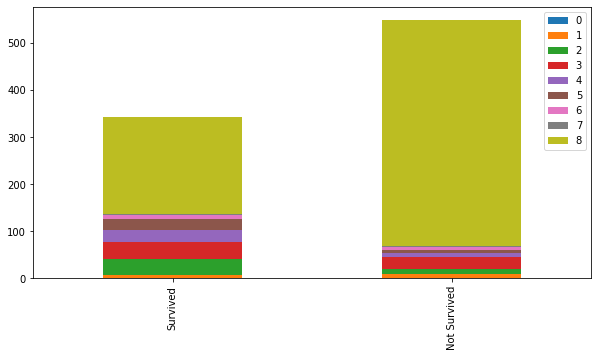

In [1637]:
bar_chart('Deck')

The Chart confirms that feature Deck contributes to survival probability. 

# Age

Feature Age is missing **177** values. 
We will create aan array that contains random numbers computed based on the mean age value in regards to the STD and is_null.

In [1638]:
data = [train_df, test_df]

for dataset in data:
    mean = dataset['Age'].mean()
    std = dataset['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice
    dataset['Age'] = train_df['Age'].astype(int)
    
train_df['Age'].isnull().sum()    

0

# Embarked

Feature Embarked is missing **2** values. We fill NaNs with most common one.

In [1639]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [1640]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

# Converting Float and Categorical features

In [1641]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


Feature Fare is float and features Name, Sex, Ticket, Embarked are categorical. Lets convert them. 

# Fare

Fill NaN as 0 and conver float to int64:

In [1642]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

# Name

Use feature Name to extract Titles:  

In [1643]:
data = [train_df, test_df]

for dataset in data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.')

train_df['Title'].value_counts()      

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

Lets explore rare titles:

Rev - a title for a member of the Christian clergy (= official workers of the church).

Mlle - mademoiselle, the French equivalent of "Miss".

Major - a military rank of commissioned officer status.

Col - a written abbreviation for colonel.

Countess - a member of nobility who ranks below marquess/marchioness in the British peerage system.

Capt - a captain.

Ms -  woman that is unmarried and over 30 or if she prefers being addressed with a marital-status neutral title.

Sir - a formal honorific address in English for men.

Lady - a woman with a title of nobility or honorary title suo jure.

Mme - a polite form of address for women.

Don -  a master of a household, a title with background from the Roman Republic in classical antiquity.

Jonkheer - the lowest title within the nobility system, recognised by the Court of Cassation.

Seems like we can replase Mlle and Ms with Miss, Mme - with Mrs.

We can group other titles into new category "Other".

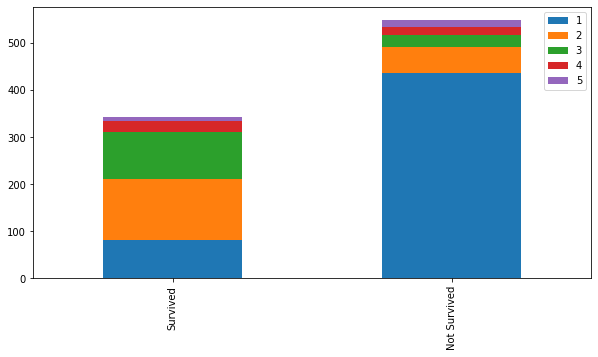

In [1644]:
data = [train_df, test_df]
new_titles = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Other': 5}

for dataset in data:
    # replacing Mlle and Ms
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    # replacing Mme
    dataset['Title'] = dataset['Title'].replace(['Mme'], 'Mrs')
    # replacing Others
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    
    # mapping titles
    dataset['Title'] = dataset['Title'].map(new_titles)
    
# dropping feature Name
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

bar_chart('Title')

Chart shows us that feature Title also contribute to survival probability.

# Sex

Converting categorical feature Sex into numeric:

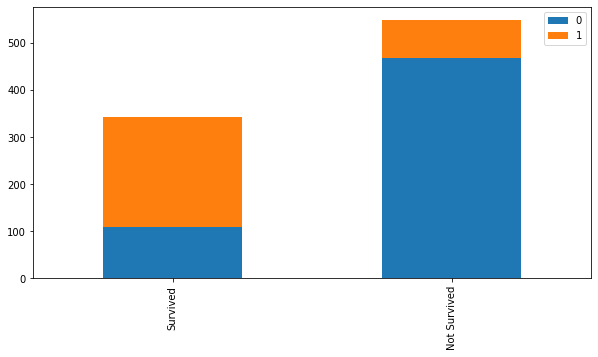

In [1645]:
genders = {'male': 0, 'female': 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
    
bar_chart('Sex')    

Chart shows that Women are most likely to survive and Men are most likely to not survive.

# Ticket

In [1646]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

There are 681 unique tickets so it'll be hard to convert them into categories. Let's just drop it from the dataset.

In [1647]:
train_df = train_df.drop(['Ticket'], axis=1) 
test_df = test_df.drop(['Ticket'], axis=1) 

# Embarked
Converting into numeric:

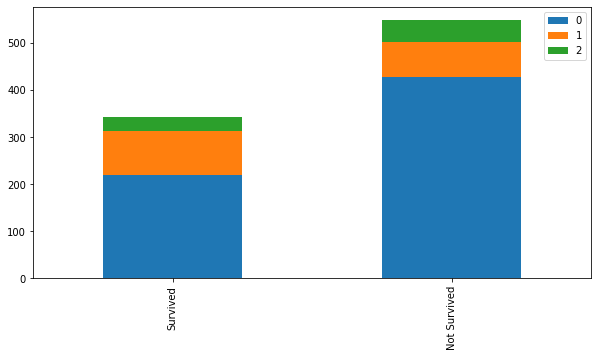

In [1648]:
ports = {"S": 0, 'C': 1, 'Q': 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    
bar_chart('Embarked')    

# Creating categories within continious features Age and Fare:

In [1649]:
train_df['Age'].describe()

count    891.000000
mean      29.459035
std       13.524728
min        0.000000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

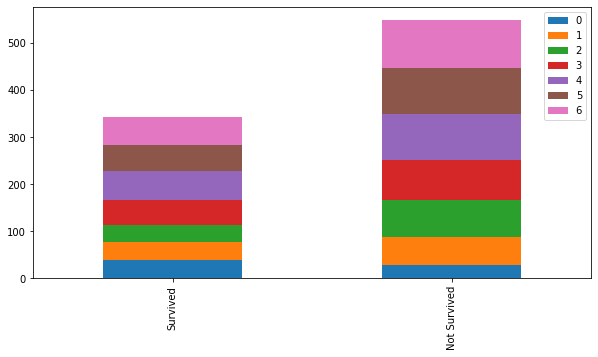

In [1650]:
data = [train_df, test_df]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    category = pd.cut(dataset['Age'], bins = [-1, 11, 18, 22, 27, 33, 40, 99], labels=['0',
                     '1', '2', '3', '4', '5', '6'])
    dataset.insert(5, 'Age Group', category)
   
train_df = train_df.drop(['Age'], axis=1)    
test_df = test_df.drop(['Age'], axis=1)   

train_df['Age Group'] = train_df['Age Group'].astype(int)
test_df['Age Group'] = test_df['Age Group'].astype(int)

bar_chart('Age Group')

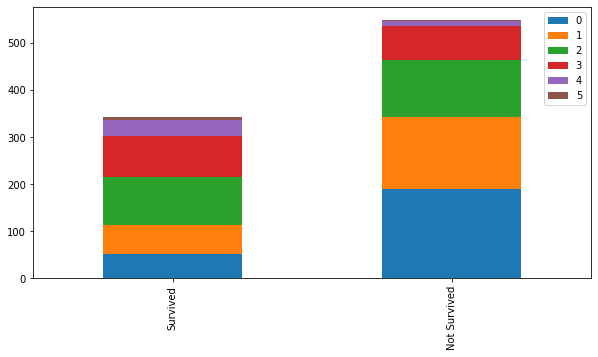

In [1651]:
data = [train_df, test_df]

for dataset in data:
    category = pd.cut(dataset['Fare'], bins = [-1, 7, 14, 31, 99, 250, 512], labels=['0', '1', '2', '3', '4', '5'])
    dataset.insert(6, 'Fare Group', category)

train_df = train_df.drop(['Fare'], axis=1)    
test_df = test_df.drop(['Fare'], axis=1)   

train_df['Fare Group'] = train_df['Fare Group'].astype(int)
test_df['Fare Group'] = test_df['Fare Group'].astype(int)

bar_chart('Fare Group')


In [1652]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Age Group,Parch,Fare Group,Embarked,Deck,Title
0,0,3,0,1,2,0,0,0,8,1
1,1,1,1,1,5,0,3,1,3,3
2,1,3,1,0,3,0,0,0,8,2
3,1,1,1,1,5,0,3,0,3,3
4,0,3,0,0,5,0,1,0,8,1


# Bulding Machine Learning Model

In [1653]:
X_train = train_df.drop('Survived', axis=1)
Y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis=1).copy()

In [1654]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

lr_pred = lr.predict(X_test)

acc_lr = round(lr.score(X_train, Y_train) * 100, 2)
print(acc_lr)

81.37


In [1655]:
df = pd.DataFrame({'PassengerId': test_df['PassengerId'],
                  "Survived": lr_pred})

In [1656]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [1657]:
df.to_csv('submission.csv', index=False)